# Nearest Neighbor Classification
### M2 Modélisation

October 2025

In [97]:
import matplotlib.pyplot as plt
import math, random
import numpy as np
import scipy.stats as sps
from time import perf_counter

# 1. Theory

Our goal is to construct a classifier based on a sample $\mathcal D_n=\{(\mathbf{X}_1,Y_1), \ldots, (\mathbf{X}_n,Y_n)\}$ of i.i.d. random couples with the same distribution as, and independent of, a generic pair $(\mathbf{X}, Y)\in\mathbb{R}^d\times\{0,1\}$. Given $\mathcal D_n$, a classifier $\eta_n(\mathbf{x})=\eta_n(\mathbf{x},\mathcal D_n)$ has values in $\{0,1\}$ and assigns to each $\mathbf{x}$ a label 0 or 1. Since $Y\in\{0,1\}$, the regression function takes the form
$$
r(\mathbf{x}):=\mathbb{E}\left[Y|\mathbf{X}=\mathbf{x}\right]=\mathbb{P}(Y=1|\mathbf{X}=\mathbf{x}).
$$
In this context, the best classifier is the so-called Bayes classifier, defined for all $\mathbf{x}\in\mathbb{R}^d$ by
$$
\eta^\star(\mathbf{x}):=\mathbf{1}_{r(\mathbf{x})>\frac{1}{2}}=\left\{\begin{array}{l}
1\ \ \mbox{if}\ \mathbb{P}(Y=1|\mathbf{X}=\mathbf{x})>\mathbb{P}(Y=0|\mathbf{X}=\mathbf{x})\\
0\ \ \mathrm{otherwise.}
\end{array}\right.
$$
We indeed know that, almost surely, for any classifier $\eta_n$
$$L^\star=L(\eta^\star):=\mathbb{P}(\eta^\star(\mathbf{X})\neq Y)\leq L(\eta_n):=\mathbb{P}(\eta_n(\mathbf{X})\neq Y|\mathcal D_n).$$
Recall that a classifier $\eta_n$ is said universally consistent if, for any distribution of $(\mathbf{X},Y)$,
$$
\mathbb{E}\left[L(\eta_n)\right]=\mathbb{P}(\eta_n(\mathbf{X})\neq Y)\xrightarrow[n\to\infty]{}L^\star.
$$
A standard approach to construct a classifier $\eta_n$ is to estimate the regression function $r(\mathbf{x})=\mathbb{P}(Y=1|\mathbf{X}=\mathbf{x})$ through some regression estimate $r_n$ and then apply a thresholding rule, that is
$$
\eta_n(\mathbf{x}):=\mathbf{1}_{r_n(\mathbf{x})>\frac{1}{2}}.
$$
In particular, this is the case for the nearest neighbor classifier, which consists in a majority vote among the $k$ nearest neighbors of a point $\mathbf{x}$, that is
$$
\eta_n^{(k)}(\mathbf{x}):=\left\{\begin{array}{l}
1\ \ \mathrm{if}\ \frac{1}{k}\sum_{i=1}^k Y_{(i)}(\mathbf{x})>\frac{1}{2}\\
0\ \ \mathrm{otherwise.}
\end{array}\right.
$$
It is well known that if $k=k_n\to\infty$ and $k_n/n\to 0$ when $n$ goes to infinity, then the nearest neighbor classifier is universally consistent.

# 2. Gaussian mixture

For a vector $m$ in dimension $d$, let us consider the following model:
- The label $Y$ has Bernoulli distribution with parameter $1/2$;
- If $Y=0$, respectively $Y=1$, then $\mathbf X\sim\mathcal N(0,\sigma^2I_d)$, respectively $\mathbf X\sim\mathcal N(m,\sigma^2I_d)$.

Another formulation of the model is as follows:
- The law of $\mathbf X$ is a mixture of Gaussians, namely $\mathbf X\sim\frac{1}{2}\mathcal N(0,\sigma^2I_d)+\frac{1}{2}\mathcal N(m,\sigma^2I_d)$ ;
- Given $\mathbf X=\mathbf x$, the random variable $Y$ has Bernoulli distribution with parameter
  $$r(\mathbf x)=\mathbb{P}(Y=1|\mathbf X=\mathbf x)=\left(1+\exp\left\{-\frac{1}{2\sigma^2}\left(\|\mathbf x\|^2-\|\mathbf x-m\|^2\right)\right\}\right)^{-1}.$$
Accordingly, the Bayes classifier writes
$$\eta^\star(\mathbf x):=\mathbf{1}_{r(\mathbf x)>\frac 1 2}=\mathbf{1}_{\|\mathbf x\|>\|\mathbf x-m\|},$$  
and the Bayes error is
$$L^\star=\mathbb P\left(\left.\|\mathbf X\|^2>\|\mathbf X-m\|^2\ \right|\ Y=0\right)=\mathbb P\left(\left.\mathbf X \cdot \mathbf v>\frac{\|m\|}{2}\ \right|\ Y=0\right),$$
where $\mathbf v:=\frac{m}{\|m\|}$. If $Y=0$ then $\mathbf X\sim\mathcal N(0,\sigma^2I_d)$ so $\mathbf X \cdot \mathbf v\sim\mathcal N(0,\sigma^2)$ and
$$L^\star=\mathbb P\left(\mathcal N(0,1)>\frac{\|m\|}{2\sigma}\right).$$

>**Question 1.**
In dimension $d=2$, draw a sample $\mathcal D_n=\{(\mathbf X_i,Y_i), 1\leq i\leq n\}$, add the point $m$ and the level set $\{r\equiv \frac{1}{2}\}$.
>

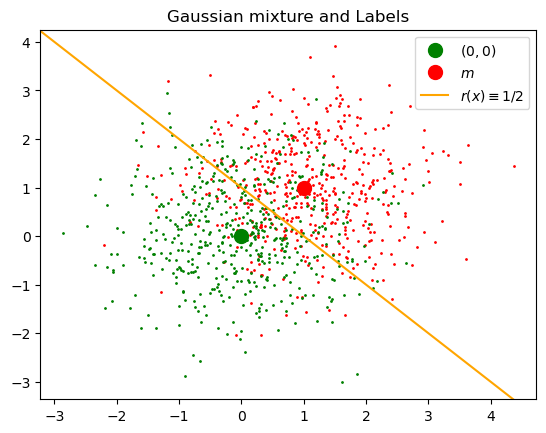

In [312]:
n = 1000
d = 2
m = np.ones(d)
sigma = 1
Gamma = sigma**2 * np.eye(d)

# Complete

# End complete

plt.scatter(X[:n1,0], X[:n1,1], color='red', s = 1)
plt.scatter(X[n1:,0], X[n1:,1], color='green', s = 1)
plt.plot(0, 0, 'go', ms=10, label="$(0,0)$")
plt.plot(m[0], m[1], 'ro', ms=10, label="$m$")
plt.axline(m/2, slope=-m[0]/m[1], color ='orange', label='$r(x)\equiv 1/2$')
plt.title('Gaussian mixture and Labels')
plt.legend(loc="best");

>**Question 2.**
Let $n$ be fixed and large enough. Plot $\mathbb{P}(\eta_n^{(k)}(\mathbf{X})\neq Y)=\mathbb{E}[L(\eta_n^{(k)})]$ as a function of $k\in\{1,\dots,n\}$.
>

In [314]:
def order(Xl, Xt):
    unl = np.ones(Xl.shape[0])
    unt = np.ones(Xt.shape[0])
    dist = np.outer((Xt**2).sum(axis=1),unl) + np.outer(unt,(Xl**2).sum(axis=1)) - 2*Xt @ Xl.T
    order = np.argsort(dist, axis=1)
    return order

In [316]:
def mixturesample(n, d, m, Gamma):
    Y  = np.zeros(n)
    X = np.zeros((n, d))
    n1 = int(np.random.binomial(n, p=0.5, size=1))
    Y[:n1] = 1
    X[:n1,] = np.random.multivariate_normal(size=n1, mean=m, cov=Gamma, check_valid='ignore')
    Y[n1:] = 0
    X[n1:,] = np.random.multivariate_normal(size=n-n1, mean=np.zeros(d), cov=Gamma, check_valid='ignore')
    return X, Y

Duration (s) : 8.1


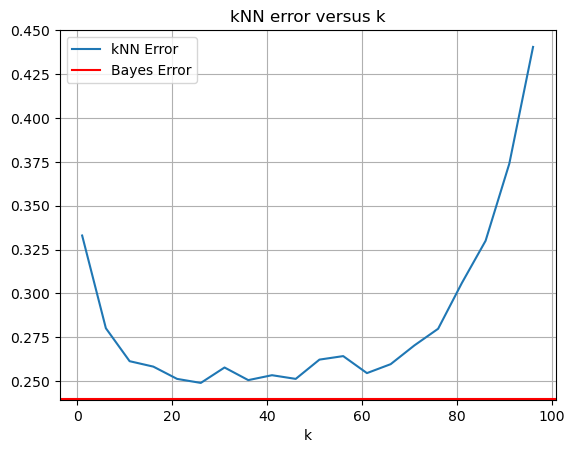

In [318]:
d = 2
m = np.ones(d)
sigma = 1
Gamma = sigma**2 * np.eye(d)
Lstar = sps.norm.sf(np.linalg.norm(m)/(2 * sigma))
n = 100
k_values = np.arange(1, n, 5)
N = 10000

t0 = perf_counter()

# Complete

# End complete

print(f"Duration (s) : {perf_counter()-t0:1.1f}")

plt.plot(k_values, Perr, label="kNN Error")
plt.axhline(Lstar, label="Bayes Error", color="red")
plt.xlabel('k')
plt.title('kNN error versus k')
plt.legend(loc="best")
plt.grid(which="both");

# 3. Classification is easier than regression

We know that if $r_n$ is universally consistent, i.e.,
$$
\mathbb{E}\left[(r_n(\mathbf{X})-r(\mathbf{X}))^2\right] \xrightarrow[n\to\infty]{} 0,
$$
and $\eta_n(\mathbf{x})=\mathbf{1}_{r_n(\mathbf{x})>\frac{1}{2}}$, then 
$$
\rho_n:=\frac{\mathbb{E}\left[L(\eta_n)\right]-L^\star}{\sqrt{\mathbb{E}\left[(r_n(\mathbf{X})-r(\mathbf{X}))^2\right]}}\xrightarrow[n\to\infty]{} 0.
$$
To illustrate this, we stick to the previous example of Gaussian mixture with $k=k_n=\left\lceil\sqrt{n}\right\rceil$ and $\eta_n=\eta_n^{(k)}$. Since $k_n$ goes to infinity with $n$ and $k_n=o(n)$, the regression estimate is consistent. To estimate the previous ratio, recall that
$$r(\mathbf x)=\left(1+\exp\left\{-\frac{1}{2\sigma^2}\left(\|\mathbf x\|^2-\|\mathbf x-m\|^2\right)\right\}\right)^{-1},$$
while
$$L^\star=\mathbb P\left(\mathcal N(0,1)>\frac{\|m\|}{2\sigma}\right).$$

>**Question 3.**
Plot the ratio $\rho_n$ as a function of $n$.
>

In [152]:
def r(x, m, sigma2):
    return 1 / (1 + np.exp(-(x**2).sum()- (((x-m)**2).sum())) / (2 * sigma2))

Duration (s) : 7.3


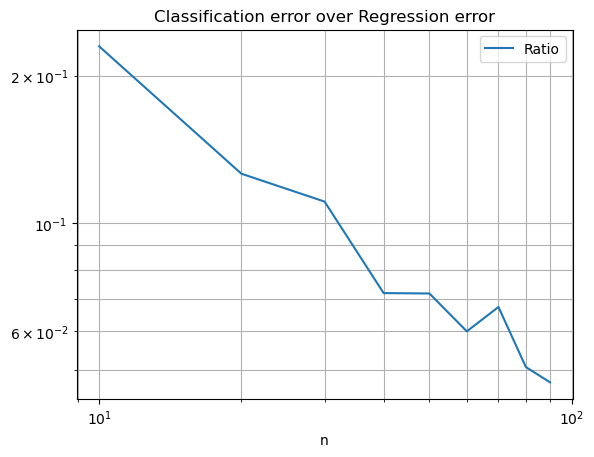

In [320]:
d = 2
m0, m1 = np.zeros(d), np.ones(d)
sigma = 1
sigma2 = sigma**2
Gamma = sigma2 * np.eye(d)
Lstar = sps.norm.sf(np.linalg.norm(m1-m0)/(2 * sigma))
n_values = np.arange(10, 100, 10)
N = 20000

t0 = perf_counter()

# Complete

# End complete

print(f"Duration (s) : {perf_counter()-t0:1.1f}")
    
plt.plot(n_values, ratio, label="Ratio")
plt.title('Classification error over Regression error')
plt.xscale("log")
plt.yscale("log")
plt.xlabel('n')
plt.legend(loc="best")
plt.grid(which="both");

# 4. Deterministic label

In dimension $d$, the model is as follows:
- $\mathbf{X}$ is standard Gaussian, that is $\mathbf{X}\sim\mathcal N(0, I_d)$;
- Given $\mathbf{X}=\mathbf{x}$, the label $Y$ is equal to 1 if $\|\mathbf{x}\|>\sqrt{d}$, and 0 otherwise.
  
Notice that, since the label is deterministic, we have $L^\star=0$ where Bayes classifier simply writes $\eta^\star(\mathbf{x})=\mathbf{1}_{\|\mathbf{x}\|>\sqrt{d}}$.

>**Question 4.**
In dimension $d=2$, draw a sample $\mathcal D_n=\{(\mathbf X_i,Y_i), 1\leq i\leq n\}$.
>

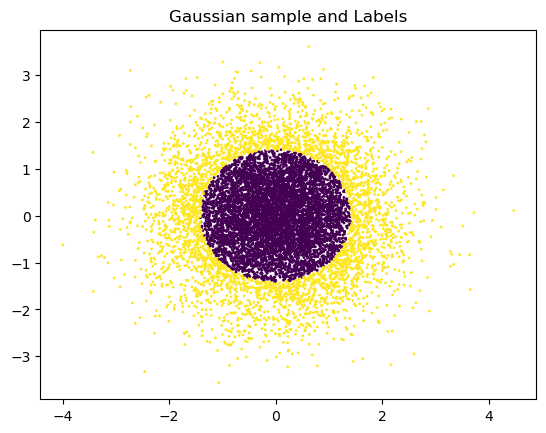

In [336]:
n = 10000
d = 2

# Complete

# End complete

plt.title('Gaussian sample and Labels')
plt.scatter(X[:,0], X[:,1], s = 1, c=Y, alpha=1);

>**Question 5.**
Let $n$ be fixed and large enough. Plot $\mathbb{P}(\eta_n^{(k)}(\mathbf{X})\neq Y)=\mathbb{E}[L(\eta_n^{(k)})]$ as a function of $k\in\{1,\dots,n\}$.
>

In [162]:
def gaussiansample(n, d):
    X = np.random.randn(n, d)
    Y = (X**2).sum(axis=1) > d
    return X, Y

Duration (s) : 2.3


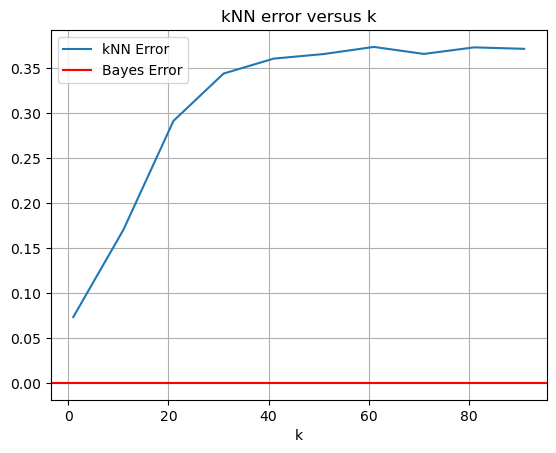

In [340]:
d = 2
Gamma = np.eye(d)
Lstar = 0
n = 100
k_values = np.arange(1, n, 10)
N = 10000

t0 = perf_counter()

# Complete

# End complete

print(f"Duration (s) : {perf_counter()-t0:1.1f}")

plt.plot(k_values, Perr, label="kNN Error")
plt.axhline(Lstar, label="Bayes Error", color="red")
plt.xlabel('k')
plt.title('kNN error versus k')
plt.legend(loc="best")
plt.grid(which="both");

>**Question 6.**
We let $k=1$ and we want to illustrate that
$$\mathbb{P}\left(\eta_n^{(1)}(\mathbf{X})\neq Y\right)=\mathbb{E}\left[L(\eta_n^{(1)})\right]\xrightarrow[n\to\infty]{}0.$$
Plot $\mathbb{E}[L(\eta_n^{(1)})]$ as a function of $n$.
>

In [217]:
def NN(Xl, Xt):
    unl = np.ones(Xl.shape[0])
    unt = np.ones(Xt.shape[0])
    dist = np.outer((Xt**2).sum(axis=1),unl) + np.outer(unt,(Xl**2).sum(axis=1)) - 2*Xt @ Xl.T
    return np.argmin(dist, axis=1)

Duration (s) : 3.3


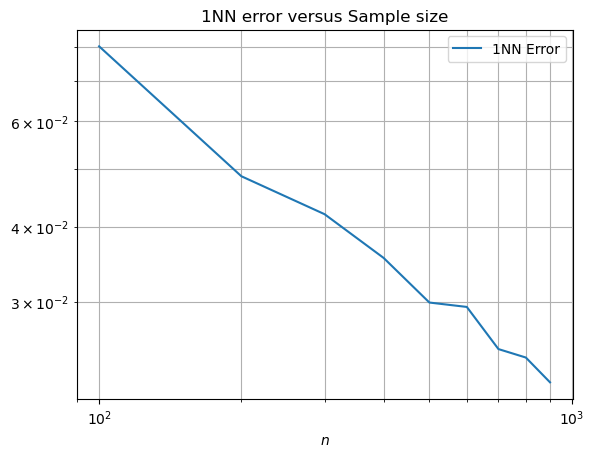

In [239]:
d = 2
Gamma = np.eye(d)
n = 1000
n_values = np.arange(100, n, 100)
N = 10000

t0 = perf_counter()

# Complete

# End complete

print(f"Duration (s) : {perf_counter()-t0:1.1f}")

plt.plot(n_values, Perr, label="1NN Error")
plt.xlabel('$n$')
plt.title('1NN error versus Sample size')
plt.legend(loc="best")
plt.xscale("log")
plt.yscale("log")
plt.grid(which="both");

>**Question 7.**
Let $n$ be fixed, $k=1$ and denote $L(\eta_{n,d}^{(1)})$ the nearest neighbor classifier in dimension $d$. Plot $\mathbb{E}[L(\eta_{n,d}^{(1)}]$ as a function of $d$ and explain what happens.
>

Duration (s) : 27.9


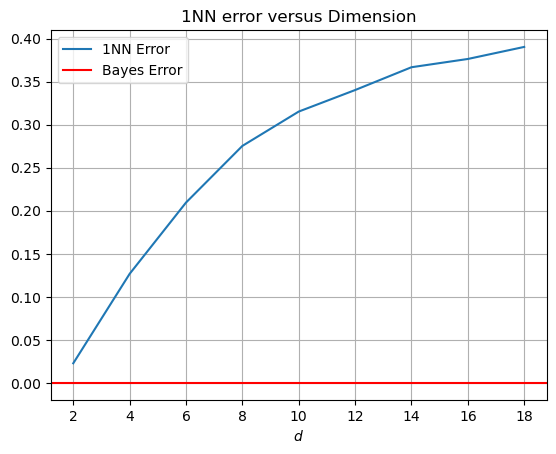

In [268]:
dmax = 20
d_values = np.arange(2, dmax, 2)
Lstar = 0
n = 1000
N = 10000

t0 = perf_counter()
# Complete

# End complete

print(f"Duration (s) : {perf_counter()-t0:1.1f}")

plt.plot(d_values, Perr, label="1NN Error")
plt.axhline(Lstar, label="Bayes Error", color="red")
plt.title('1NN error versus Dimension')
plt.xlabel('$d$')
plt.legend(loc="best")
plt.grid(which="both");